# Tâche 8 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
from pymatgen.electronic_structure.core import Spin
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import *

In [17]:
struct = MPRester("BTfRdPWCgouk2CI3AZ6").get_structure_by_material_id("mp-8882")

# Téléchargement de la structure de bande du GaP

In [18]:
with MPRester("BTfRdPWCgouk2CI3AZ6") as m:
    bandstruct = m.get_bandstructure_by_material_id("mp-8882")

# Détermination de la bande interdite

Dans cette section, nous allons : 

- calculer l'énergie de la bande interdite 
- déterminer quelles bandes sont les bandes possédant les VBM (valence band maximum) et CBM (conduction band minimum)
- plotter la structure électronique du GaP

In [19]:
print("Le band gap est de", bandstruct.get_band_gap()['energy'],"[eV]")

Le band gap est de 1.2984 [eV]


In [20]:
BSplot = BSPlotter(bandstruct)
BranchEnergies = BSplot.bs_plot_data()['energy'] 
Branchk = BSplot.bs_plot_data()['distances'] 

print('\n',bandstruct.get_vbm()['band_index'])
print("Les bandes 16 et 17 contiennent le VBM.")
print('\n',bandstruct.get_cbm()['band_index'])
print("La bande 18 contient le CBM.")


 defaultdict(<class 'list'>, {<Spin.up: 1>: [16, 17]})
Les bandes 16 et 17 contiennent le VBM.

 defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
La bande 18 contient le CBM.


In [21]:
""" Initialisation des données et variables utiles par la suite"""

plot = plotter.BSPlotter(bandstruct)
data = plot.bs_plot_data()
distance = data.get('ticks').get('distance')
distances = data.get('distances')
energy = data.get('energy')
bandgap = bandstruct.get_band_gap()

Text(0.5, 1.0, 'Structure de bandes électroniques du GaP')

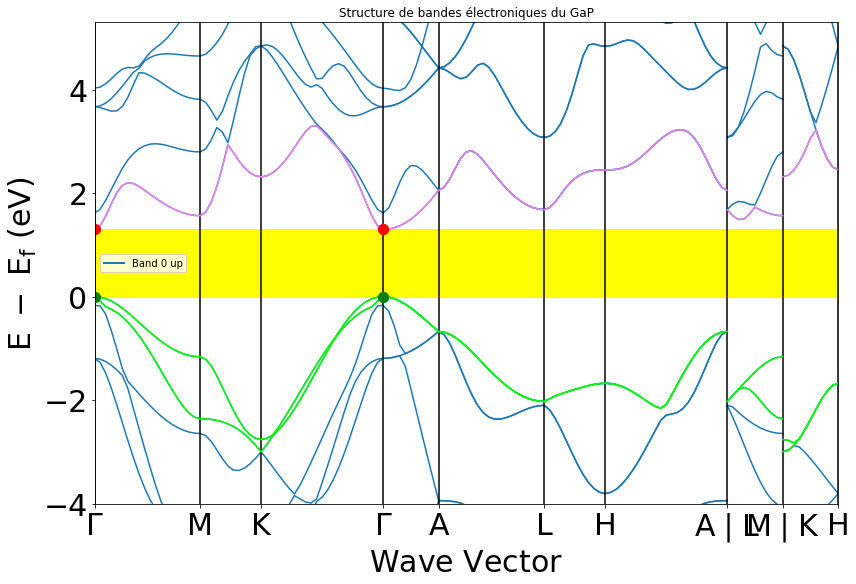

In [22]:
# Pour mettre la structure de bandes sur le graph
plot.get_plot()

# Pour mettre en evidence les dernières de valence et la première bande de conduction
for i in range(9):
    plt.plot(distances[i],energy.get('1')[i][16],'lime')
    plt.plot(distances[i],energy.get('1')[i][17],'lime')
    plt.plot(distances[i],energy.get('1')[i][18],'violet')
    
# Pour mettre les CBM sur le graph
cbms = data.get('cbm')
for i in range(len(cbms)):
    (x,y) = cbms[i]
    plt.plot(x, y, 'or', markersize = 10)

# Pour mettre les VBM sur le graph    
vbms = data.get('vbm')
for i in range(len(vbms)):
    (x,y) = vbms[i]
    plt.plot(x, y, 'og', markersize = 10)

# Pour tracer la bande interdite 
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, bandgap.get('energy'), color = "yellow")

# Pour le titre 
plt.title('Structure de bandes électroniques du GaP')

Détaillons le graphique de la structure des bandes électroniques du GaP : 

- Les points rouges représentent les minima de la bande de conduction (Conduction Band Minimum ou CBM) et se retrouvent sur la bande 18.
- Les points verts représentent les maxima de la bande de valence (Valence Band Maximum ou VBM) et se retrouvent sur les bandes 16 et 17.
- La première bande de conduction est en mauve. 
- Les dernières bandes de valence sont en vert clair. 
- Les autres bandes permises sont en bleu. 
- La bande interdite est dessinée en jaune. 

Notons quelques points importants  : 
- La bande interdite est la bande de niveaux d'énergie qui ne peuvent pas être occupés par les électrons. 
- Elle est directe car les extrema des bandes de conduction et de valence (CBM et VBM) sont alignés verticalement. 
- Elle a une énergie de 1.2984 eV. 
- Le matériau est un semi-conducteur car la bande interdite est de l’ordre de 1 à 2 eV.

Note importante : 

Comme nous avons deux dernières bandes de valence pour le GaP, j'ai décidé de faire la suite de la tâche en ne faisant les calculs que pour la bande 17 (donc pas pour la bande 16) et éviter ainsi de la redondance.

# Dispersions maximale et minimale sur la dernière bande de valence et la première bande de conduction

Dans cette section, nous allons :

- déterminer les dispersions maximales sur la dernière bande de valence et la première bande de conduction 
- déterminer les directions pour lesquelles elles ont lieu 
- déterminer les dispersions minimales sur la dernière bande de valence et la première bande de conduction 
- déterminer les directions pour lesquelles elles ont lieu 

Pour calculer les extrema de dispersion, nous utiliserons la valeur absolue de la pente la plus et la moins élevée parmi toutes les pentes calculées.  
La pente se calculera comme le rapport de la variation d'énergie sur la variation de distance, soit pente = ΔE / Δx. 

Pour chacune des directions, le ΔE vaudra la différence entre les ordonnées des points en bordures de cette direction et Δx vaudra la différence entre les abscisses des points en bordures de cette direction.


Il existe 8 directions possibles : 
   
Γ - M

M - K

K - Γ

Γ - A

A - L

L - H

A|L - M|K

M|K - H

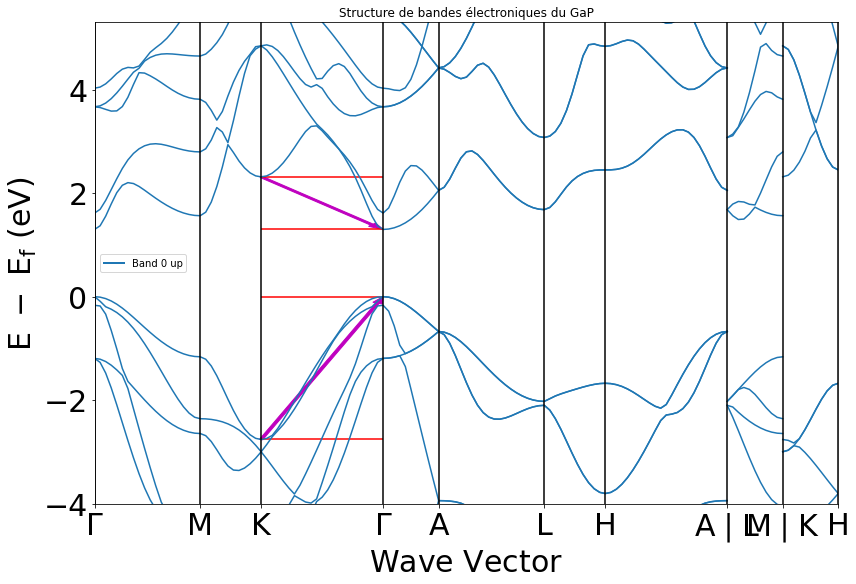

In [23]:
"""
Cette fonction renvoie :
- index :  l'index pour lequelle la direction possède la dispersion est maximale 
- ext1 et ext2 : les deux énergies des points en bordures de la dispersion maximale
- pente : la pente entre les points ext1 et ext2
"""
def grande_dispersion(y):
    
    NRJ = energy.get('1')
    pente = 0
    index = 0
    ext1 = 0
    ext2 = 0
    
    for i in range(9):
        x = NRJ[i][y]
        dist = distances[index][-1] - distances[index][0]
        val = (abs(x[0] - x[-1])) / dist
        if (val > pente): 
            index = i 
            ext1 = x[0]
            ext2 = x[-1]
            pente = val
    
    return [index, ext1, ext2, pente]

"""
Cette fonction permet : 
de tracer les flèches mauves qui montrent la plus grande dispersion et 
de tracer les lignes horizontales pour mieux visualiser les dispersions 
"""
def fleche(y): 
    a = grande_dispersion(y)
    X0 = distances[a[0]][0]
    X1 = distances[a[0]][-1]
    
    plt.hlines(a[1], X0, X1, color = 'red')
    plt.hlines(a[2], distances[a[0]][0], distances[a[0]][-1], color = 'red')
    plt.arrow(X0, a[1], X1 - X0, a[2] - a[1], color = 'm',width = 0.03,length_includes_head = True )
    
plot.get_plot()
plt.title('Structure de bandes électroniques du GaP')
fleche(18)
fleche(17)

Sur le graphiques, les flèches mauves montrent la dispersion maximale et les lignes horizontales rouges permettent juste de mieux visualiser les écarts.


Dispersions maximales : 
- Pour la dernière bande de valence, la dispersion maximale a lieu dans la direction K - Γ. 
- Pour la première bande de conduction, la dispersion maximale a lieu dans la direction K - Γ. 

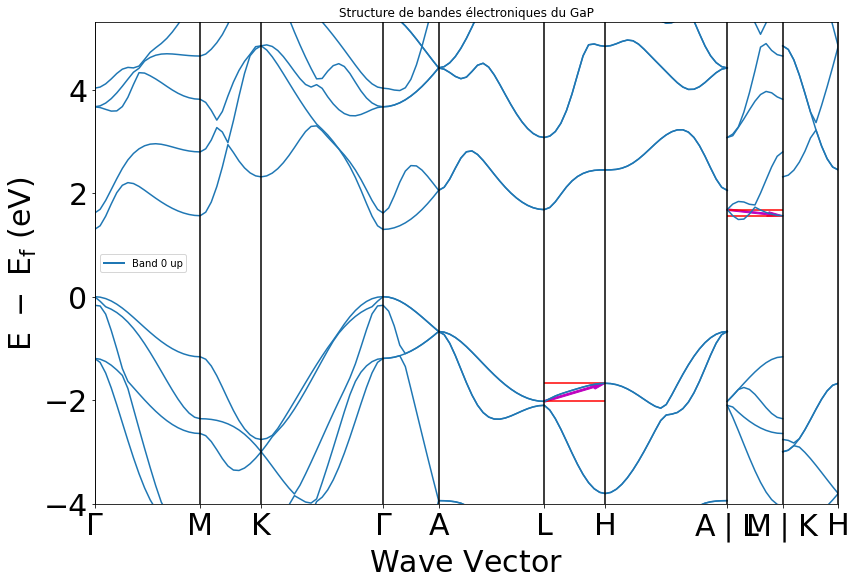

In [24]:
"""
Cette fonction renvoie :
- index :  l'index pour lequelle la direction possède la dispersion est minimale 
- ext1 et ext2 : les deux énergies des points en bordures de la dispersion minimale
- pente : la pente entre les points ext1 et ext2
"""
def petite_dispersion(y):
    NRJ = energy.get('1')
    pente = (abs(NRJ[0][y][0] - NRJ[0][y][-1]))
    index = 0
    ext1 = NRJ[0][y][0]
    ext2 = NRJ[0][y][-1]
    for i in range(9):
        x = NRJ[i][y]
        dist = distances[index][-1] - distances[index][0]
        val = (abs(x[0] - x[-1])) / dist
        if (val < pente): 
            index = i 
            ext1 = x[0]
            ext2 = x[-1]
            pente = val
    
    return [index, ext1, ext2, pente]


"""
Cette fonction permet : 
de tracer les flèches mauves qui montrent la plus faible dispersion et 
de tracer les lignes horizontales pour mieux visualiser les dispersions 
"""
def fleche (y): 
    b = petite_dispersion(y)
    X0 = distances[b[0]][0]
    X1 = distances[b[0]][-1]
    
    plt.hlines(b[1], X0, X1, color = 'red')
    plt.hlines(b[2], distances[b[0]][0], distances[b[0]][-1], color = 'red')
    plt.arrow(X0, b[1], X1 - X0, b[2] - b[1], color ='m',width = 0.03,length_includes_head = True )

plot.get_plot()
plt.title('Structure de bandes électroniques du GaP')
fleche(18)
fleche(17)

Sur le graphiques, les flèches mauves montrent la dispersion maximale et les lignes horizontales rouges permettent juste de mieux visualiser les écarts.


Dispersions minimales :

- Pour la dernière bande de valence, la dispersion minimale a lieu dans la direction L - H.
- Pour la première bande de conduction, la dispersion minimale a lieu dans la direction A|L - M|K.

# Calcul de la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique 

Dans cette section, nous allons : 
- détailler le calcul de la masse effective en supposant une dispersion parabolique
- tracer la structure des bandes électroniques du GaP en y insérant une parabole au sommet de la dernière bande de valence
- calculer la masse effective 
- tracer la structure des bandes électroniques du GaP en y insérant une parabole au base de la première bande de conduction
- calculer la masse effective 

En supposant une dispertion parabolique, la masse effective se calcule comme : 
$$m^* = \frac{\hbar^2}{\frac{\delta^2 E}{\delta k^2}}$$

où 
- h_barre = 1.054571817E-34 J.s est la constante de Planck  divisée par 2π 
- le dénominateur est la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.



Méthodologie pour trouver la parabole : 

Nous allons considérer 5 points et réaliser une interpolation avec ceux-ci. 
Nous stockerons leurs coordonnées dans deux array (x et y)

- Le point le plus important sera celui qui se situe au sommet de la dernière bande de valence ou à la base de la première bande de conduction, il sera mis à l'index 2 dans les array.
- Les deux premiers points (aux index 0 et 1) sont deux points qui se trouvent à gauche du point important. 
- Les deux derniers points (aux index 3 et 4) sont deux points qui se trouvent à droite du point important. 

In [25]:
""""Constantes qui nous seront utiles """

# Constante de Planck réduite [J.s]
hbar = (6.62607004*10**(-34))/(2*np.pi)
# Electron volt [J]
electronvolt = 1.602176634*10**(-19)
# Angstrom [m]
angstrom = 10**(-10)

Calcul de la masse effective au sommet de la première bande de conduction en supposant une dispersion parabolique : ¶

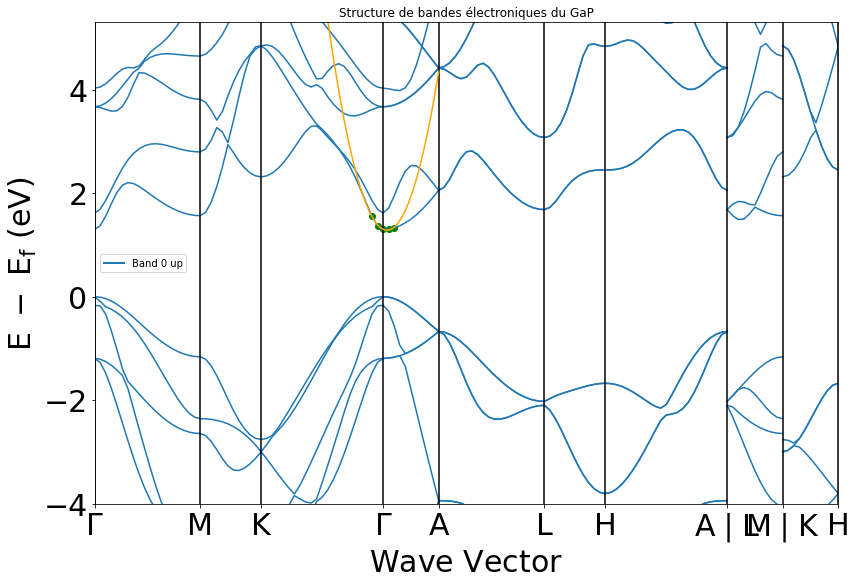

In [26]:
disp = grande_dispersion(18)
index = disp[0]

NRJ = energy.get('1')
x = np.zeros(5)
y = np.zeros(5)

# Les abscisses des 5 points 
X0 = distances[index][-3]
X1 = distances[index][-2]
X2 = distances[index][-1]  
X3 = distances[index +1][1]
X4 = distances[index +1][2]

# Les ordonnées des 5 points 
Y0 = NRJ[index][18][-3]
Y1 = NRJ[index][18][-2]
Y2 = NRJ[index][18][-1]  
Y3 = NRJ[index + 1][18][1]
Y4 = NRJ[index + 1][18][2]

# On remplit les array x et y avec les coorodonnées des 5 points
(x[0], y[0]) = (X0, Y0)
(x[1], y[1]) = (X1, Y1)
(x[2], y[2]) = (X2, Y2)
(x[3], y[3]) = (X3, Y3)
(x[4], y[4]) = (X4, Y4) 

# On fait une interpolation 
a = np.polyfit(x, y, 2)

# Figure
plot.get_plot()
plt.title('Structure de bandes électroniques du GaP')
domaine = np.linspace(distances[index][0], distances[index + 1][-1])
plt.plot(domaine, np.polyval(a, domaine), 'orange')
plt.scatter(x, y, c = 'g')

In [27]:
print("Parabole d'approximation : ","y(k) = " + str(a[0]) + "k\u00b2 + " + str(a[1]) + "k " + str(a[2]))
print("Dérivée seconde : ", str(2 * a[0]))
print("Masse effective : ", str(hbar*hbar / (2 * a[0]* electronvolt * (angstrom)**2)) + " kg")

Parabole d'approximation :  y(k) = 14.720127603545475k² + -76.23295897892095k 99.98162990292076
Dérivée seconde :  29.44025520709095
Masse effective :  2.3577640611765905e-31 kg


Sur la figure, les points verts sont les points ayant servis à l'interpolation et la courbe jaune est la parabole. 

L'equation de la parabole en vert : f(k) =  14.72 k² -76.23k + 99.98

La dérivée seconde de cette parabole : f''(k) =  29.44

En reprenant la formule décrite plus tôt, il est maintenant possible de calculer la masse effective : 

m* = 2.3577640611765905e-31 kg

Il semble logique d'avoir une masse effective positive comme la courbure de la parabole est positive.

Calcul de la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique : ¶

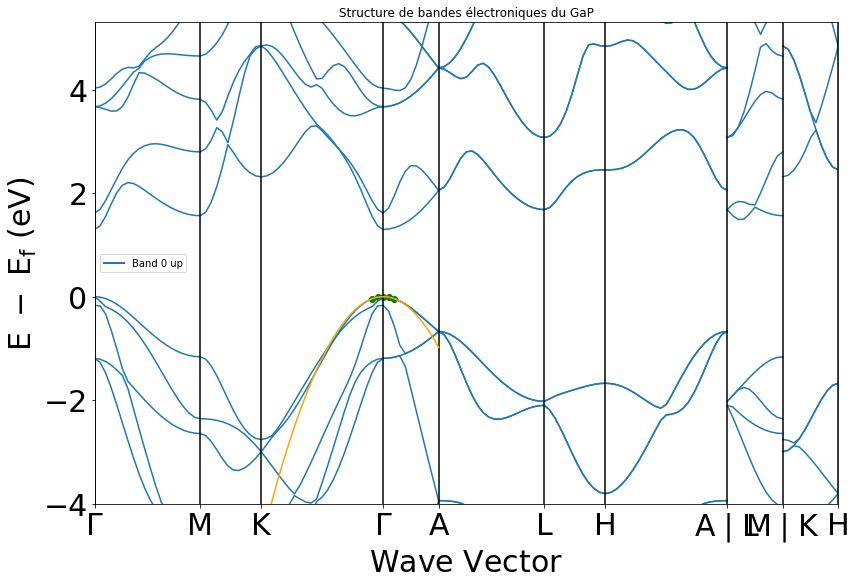

In [28]:
disp = grande_dispersion(17)
index = disp[0]

NRJ = energy.get('1')
x = np.zeros(5)
y = np.zeros(5)

# Les abscisses des 5 points 
X0 = distances[index][-3]
X1 = distances[index][-2]
X2 = distances[index][-1]  
X3 = distances[index +1][1]
X4 = distances[index +1][2]

# Les ordonnées des 5 points 
Y0 = NRJ[index][17][-3]
Y1 = NRJ[index][17][-2]
Y2 = NRJ[index][17][-1]  
Y3 = NRJ[index + 1][17][1]
Y4 = NRJ[index + 1][17][2]

# On remplit les array x et y avec les coorodonnées des 5 points
(x[0], y[0]) = (X0, Y0)
(x[1], y[1]) = (X1, Y1)
(x[2], y[2]) = (X2, Y2)
(x[3], y[3]) = (X3, Y3)
(x[4], y[4]) = (X4, Y4) 

# On fait une interpolation 
b = np.polyfit(x, y, 2)

# Figure
plot.get_plot()
plt.title('Structure de bandes électroniques du GaP')
domaine = np.linspace(distances[index][0], distances[index + 1][-1])
plt.plot(domaine, np.polyval(b, domaine), 'orange')
plt.scatter(x, y, c = 'g')

In [29]:
print("Parabole d'approximation : ","y(k) = " + str(b[0]) + "k\u00b2 + " + str(b[1]) + "k " + str(b[2]))
print("Dérivée seconde : ", str(2 * b[0]))
print("Masse effective : ", str(hbar*hbar / (2 * b[0]* electronvolt * (angstrom)**2)) + " kg")

Parabole d'approximation :  y(k) = -4.071734958327115k² + 20.804053937134306k -26.57390070764682
Dérivée seconde :  -8.14346991665423
Masse effective :  -8.52378364377438e-31 kg


Sur la figure, les points verts sont les points ayant servis à l'interpolation et la courbe jaune est la parabole. 

L'equation de la parabole en vert : f(k) =  -4.07 k² +20.80 k -26.57 

La dérivée seconde de cette parabole : f''(k) =  -8.14

En reprenant la formule décrite plus tôt, il est maintenant possible de calculer la masse effective : 

m* = -8.52378364377438e-31 kg

Il semble logique d'avoir une masse effective négative comme la courbure de la parabole est négative.